In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse
from scipy.optimize import curve_fit
from scipy.interpolate import griddata
import astropy.units as u
from astropy.coordinates import SkyCoord
from lmfit.lineshapes import gaussian2d
from lmfit.models import LorentzianModel, Gaussian2dModel
from lmfit.models import ExpressionModel
# from astropy.io import fits
from utility import CrossmatchDisfit

## Shift coordinate based on the fitting

$$\text{Crossed radius selection}$$

$$\text{Shift and go to Topcat}$$

### coor

In [3]:
Path = './CentralDogma/2_Lust_/'

# filename = [
#     '3-2MASSv2.csv', '3-NOMADv2.csv', '3-PS1v2.csv', '3-ALLWISEv2.csv',
#     '3-WISEv2.csv', '3-SIMBADv2.csv',
#     '3-CatWISEv2.csv', '3-unWISEv2.csv',
#     '3-SDSS16v2.csv', 
#     '3-IRAS_psc_allsky.csv', '3-IRAS_fsc_allsky.csv'
# ]
filename = [
    '2-2MASSv2.csv', '2-NOMADv2.csv', '2-PS1v2.csv', '2-ALLWISEv2.csv',
    '2-WISEv2.csv', '2-SIMBADv2.csv',
    '2-CatWISEv2.csv', '2-unWISEv2.csv',
    '2-SDSS16v2.csv', 
    '2-IRAS_pscv2.csv', '2-IRAS_fscv2.csv'
]

# This is for list_2
cname = [
    ['RAJ2000','DEJ2000'],['RAJ2000','DEJ2000'],['RAJ2000','DEJ2000'],['RAJ2000','DEJ2000'],
    ['ra_2a','dec_2a'], ['ra_2a','dec_2a'], 
    ['RAdeg', 'DEdeg'], ['RAdeg', 'DEdeg'], 
    ['RA_ICRS','DE_ICRS'], 
    ['ra_2','dec_2'], ['ra_2','dec_2']
]

radius = [
    [5.872, 7.429], [12.354, 12.812], [9.257, 9.388], [9.793, 10.032],
    [11.216, 11.561], [4.451, 5.515],
    [7.244, 7.195], [7.151, 7.184],
    [7.162, 7.174],
    [7.390, 5.163], [11.367, 6.594]
]

bias = [
    [0.6890,-0.5711],[0.2555,-0.4098],[0.1348,-0.056],[0.2153,-0.0679],
    [0.3079,-0.1642],[0.8619,-0.532],
    [0.0943,-0.0667],[0.1289,-0.0526],
    [0.0706,-0.046],
    [1.0773,0.7455],[1.0551, 0.0243]
]

for i in range(11):
    
    data = pd.read_csv(Path+filename[i])
    
    num = len(data.RA)
    
    era = np.ones(num)*radius[i][0]
    edec = np.ones(num)*radius[i][1]
    ang = np.zeros(num)
    
    data = data.assign(RAerr=era, DECerr=edec, ang=ang)
    
    data[cname[i][0]] += bias[i][0]/3600
    data[cname[i][1]] += bias[i][1]/3600
    
    data.to_csv('./CentralDogma/7_Violence_/'+filename[i].split('.')[0]+'_shift.csv')


In [28]:
Path = './CentralDogma/2_Lust_/'

filename = [
    '3-2MASSv2.csv', '3-NOMADv2.csv', '3-PS1v2.csv', '3-ALLWISEv2.csv',
    '3-WISEv2.csv', '3-SIMBADv2.csv',
    '3-CatWISEv2.csv', '3-unWISEv2.csv',
    '3-SDSS16v2.csv', 
    '3-IRASv2.csv'
]

radius = [
    5.872, 12.354, 9.257, 9.793,
    11.216, 4.451,
    7.195, 7.151,
    7.162,
    7.436
]

bias = [
    [0.6890,-0.5711],[0.2555,-0.4098],[0.1348,-0.056],[0.2153,-0.0679],
    [0.3079,-0.1642],[0.8619,-0.532],
    [0.0943,-0.0667],[0.1289,-0.0526],
    [0.0706,-0.046],[0.4237,-1.359]
]

d0 = pd.DataFrame()

for i in range(10):
    
    data = pd.read_csv(Path+filename[i])
    
    di = pd.DataFrame(
        data = {'RA': data.RA.loc[data.angDist<2*radius[i]],
                'DEC': data.DEC.loc[data.angDist<2*radius[i]]}
        )
    
    d0 = pd.concat([di, d0], ignore_index=True)

d0

RA        DEC
0       30.112674  -8.524387
1       30.170829 -11.692712
2       30.245431   8.311557
3       30.335136  -2.373765
4       30.549036  -0.127537
...           ...        ...
254169  49.996811  15.825194
254170  49.997408  19.095591
254171  49.997723   2.232566
254172  49.998327  11.756894
254173  49.999749   7.188172

[254174 rows x 2 columns]

In [29]:
d0.to_csv('./CentralDogma/2_Lust_/3-allCircular.csv')

In [5]:
ra = []

data = pd.read_csv('./CentralDogma/2_Lust_/3-2MASSv2.csv')

ra.append(data.RA.loc[data.angDist<10])


[35       30.016740
 58       30.030659
 66       30.032367
 70       30.033582
 71       30.033660
            ...    
 49218    49.996811
 49220    49.997408
 49222    49.997723
 49225    49.998327
 49231    49.999749
 Name: RA, Length: 4845, dtype: float64]

### flux hist

In [9]:
tsl3 = pd.read_csv('./CentralDogma/1_Limbo_/list3totalflux.csv')

NameError: name 'tsl3' is not defined

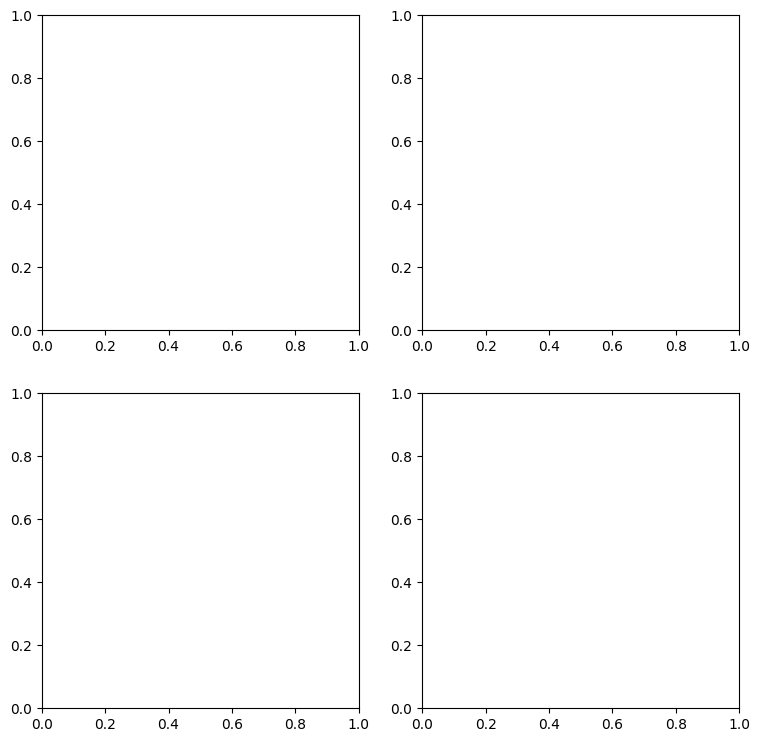

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

ax = axs[0, 0]
ax.scatter(tsl3['FLUX65'], tsl3['FERR65'], s=5, alpha=0.3, label = 'N65')
ax.set_xscale('log')
ax.set_yscale('log')   

ax = axs[0, 1]
ax.scatter(tsl3['FLUX90'], tsl3['FERR90'], s=5, alpha=0.3, label = 'WIDE-S')
ax.set_xscale('log')
ax.set_yscale('log')   

ax = axs[1, 0]
ax.scatter(tsl3['FLUX140'], tsl3['FERR140'], s=5, alpha=0.3, label = 'WIDE-L')
ax.set_xscale('log')
ax.set_yscale('log')   

ax = axs[1, 1]
ax.scatter(tsl3['FLUX160'], tsl3['FERR160'], s=5, alpha=0.3, label = 'N160')

ax.set_xscale('log')
ax.set_yscale('log')    

plt.show()

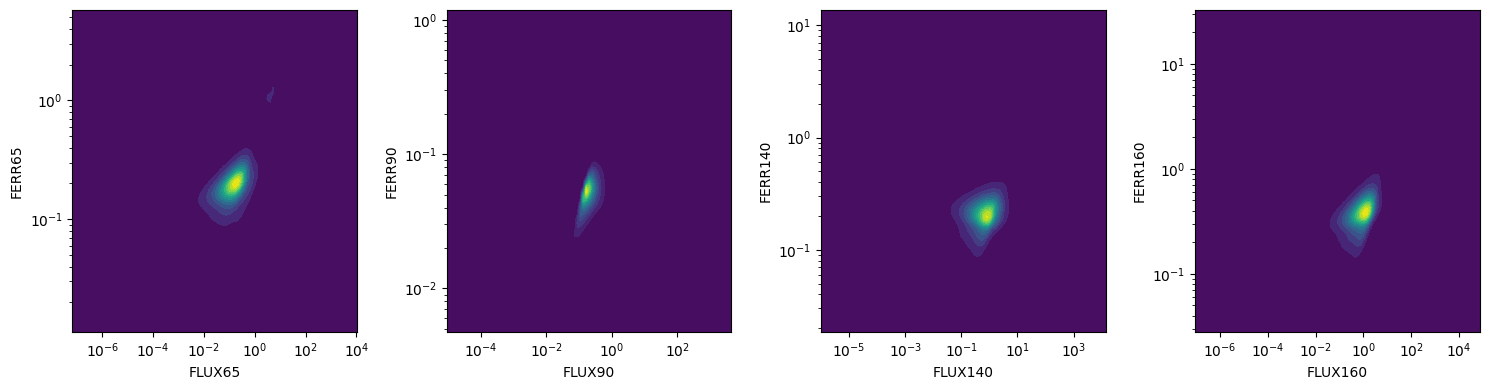

In [10]:
filterlist = ['FLUX65', 'FERR65', 'FLUX90', 'FERR90', 'FLUX140', 'FERR140', 'FLUX160', 'FERR160']

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

for i in range(4):
    
    # Example modification for the first subplot
    ax = axs[i]
    x = tsl3[filterlist[2*i]]
    y = tsl3[filterlist[2*i+1]]

    # Exclude NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    # Compute 2D histogram
    x_edges = np.logspace(np.log10(min(x)), np.log10(max(x)), 100)
    y_edges = np.logspace(np.log10(min(y)), np.log10(max(y)), 100)
    H, xedges, yedges = np.histogram2d(x, y, bins=(x_edges, y_edges))

    # Plot contours
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    ax.contourf(X, Y, H, levels=15, cmap="viridis")

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(filterlist[2*i])
    ax.set_ylabel(filterlist[2*i+1])

# Repeat similar steps for other subplots...
 
plt.tight_layout()
plt.show()

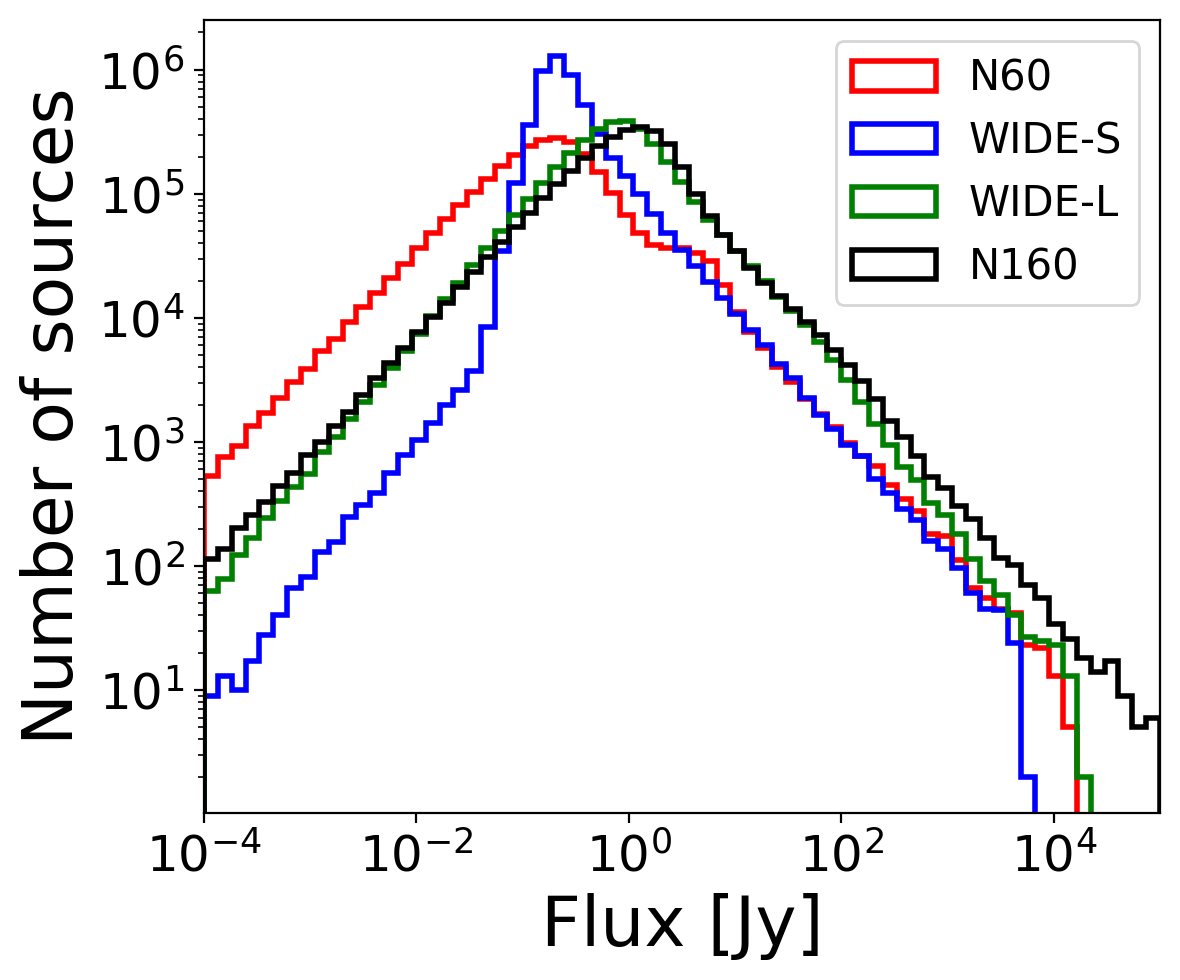

In [10]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
# log scale binsize
bin = np.logspace(np.log10(1e-4),np.log10(1e5),70)
ax.hist(tsl3['FLUX65'], bins=bin, histtype='step', color='red', lw=2, label='N60')
ax.hist(tsl3['FLUX90'], bins=bin, histtype='step', color='blue', lw=2, label='WIDE-S')
ax.hist(tsl3['FLUX140'], bins=bin, histtype='step', color='green', lw=2, label='WIDE-L')
ax.hist(tsl3['FLUX160'], bins=bin, histtype='step', color='black', lw=2, label='N160')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4, 1e5)

ax.set_xlabel('Flux [Jy]', fontsize=25)
ax.set_ylabel('Number of sources', fontsize=25)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.legend(fontsize=15)
plt.tight_layout()
plt.show()

### Flux90 BG90

In [18]:
datav1 = pd.read_csv('./CentralDogma/1_Limbo_/list3totalflux.csv',
                     usecols=['FLUX90', 'FERR90', 'BG90'])
datav2 = pd.read_csv('./CentralDogma/2_Lust_/list3v2_ra_dec.csv',
                     usecols=['FLUX90', 'FERR90', 'BG90'])
datav3 = pd.read_csv('./CentralDogma/8_Fraud_/list3v4.csv',
                     usecols=['FLUX90', 'FERR90', 'BG90'])
datav4 = pd.read_csv('./CentralDogma/9_Treachery_/list3v5.csv',
                     usecols=['FLUX90', 'FERR90', 'BG90'])
datav5 = pd.read_csv('./CentralDogma/9_Treachery_/list3v6.csv',
                     usecols=['FLUX90', 'FERR90', 'BG90'])

/tmp/ipykernel_195135/1428314552.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


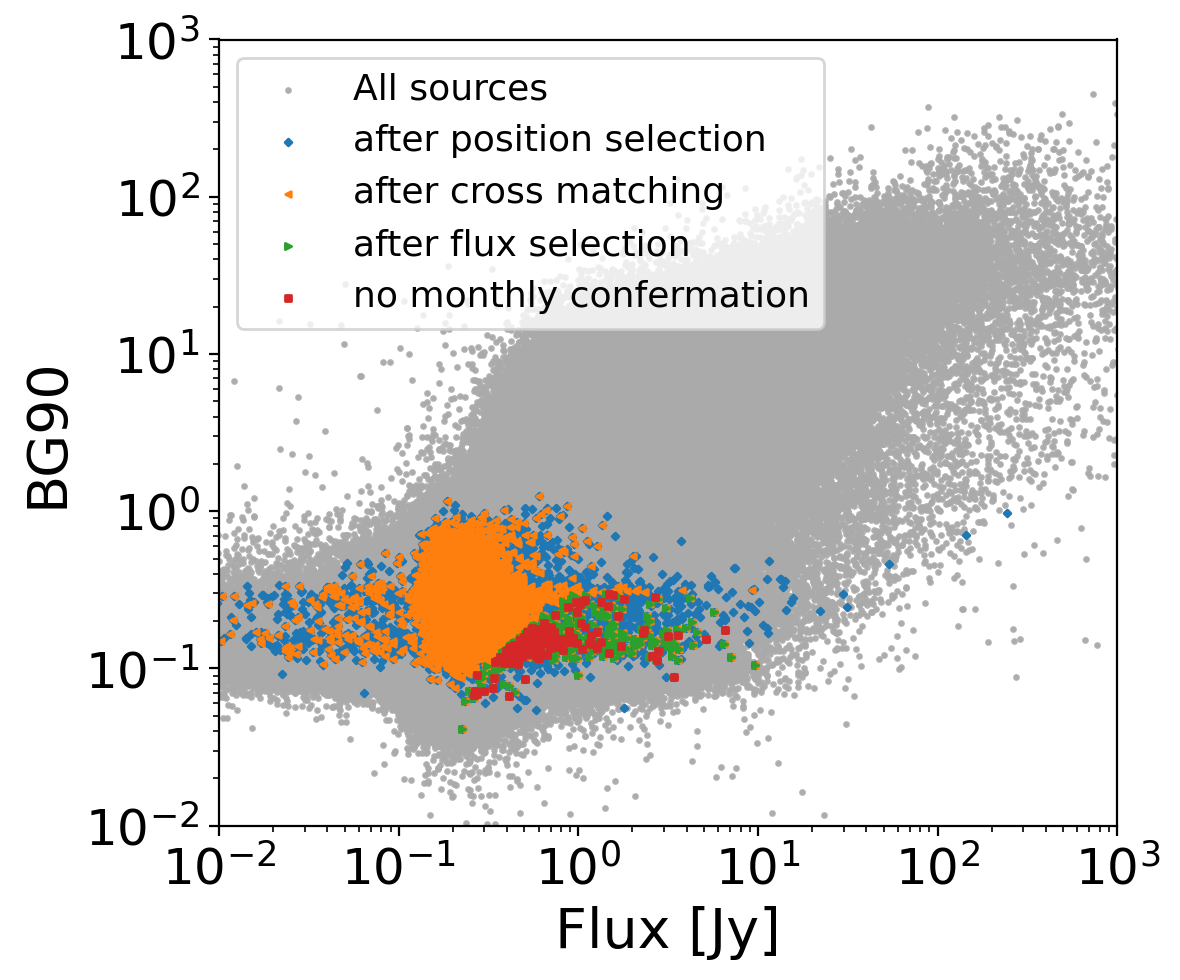

In [21]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)

ax.scatter(datav1['FLUX90'], datav1['BG90'], s=2, alpha=0.9, c='#AAAAAA',
           label='All sources')
ax.scatter(datav2['FLUX90'], datav2['BG90'], s=3, alpha=1, marker='D',
           label='after position selection')
ax.scatter(datav3['FLUX90'], datav3['BG90'], s=4, alpha=1, marker='<',
           label='after cross matching')
ax.scatter(datav4['FLUX90'], datav4['BG90'], s=5, alpha=1, marker='>',
           label='after flux selection')
ax.scatter(datav5['FLUX90'], datav5['BG90'], s=6, alpha=1, marker='s',
           label='no monthly confermation')

ax.set_xlabel('Flux [Jy]', fontsize=20)
ax.set_ylabel('BG90', fontsize=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-2, 1e3)
ax.set_ylim(1e-2, 1e3)

plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [23]:
1e-3*3600

3.6

### Ciruss plot

In [3]:
listflux = pd.read_csv('./CentralDogma/1_Limbo_/list3flux.csv')

In [4]:
def plot2(cmap, save=False):
    
    data = listflux.loc[
        (listflux.BG90 > 0.2) & (listflux.BG90 < 0.4), 
        ['RA', 'DEC', 'BG90']
    ].sort_values(by='BG90', ascending=True)
    
    fighbg = listflux.loc[
        listflux.BG90 > 0.4, 
        ['RA', 'DEC', 'BG90']
    ]
    
    ra = data.RA
    dec = data.DEC 
    Z = data.BG90
    
    fig, ax = plt.subplots(figsize=(7, 4), dpi=150)
    
    ax.scatter(
        fighbg.RA, fighbg.DEC, c='yellow',
        s=1, 
        marker='o',
        alpha=0.9
    )
    scatter = ax.scatter(
        ra, dec, c=Z,
        s=1, 
        marker='o',
        alpha=0.9, cmap=cmap
        # norm=LogNorm()  # Apply logarithmic normalization
    )
    cbar = fig.colorbar(scatter, ax=ax, label='BG90')
    # cbar.norm = LogNorm()  # Apply logarithmic normalization to the colorbar if needed
    cbar.ax.tick_params(labelsize=15)  # Change colorbar tick label fontsize
    cbar.set_label('BG90', fontsize=15)  # Change colorbar label fontsize
    
    ax.set_xlabel('Ra [deg]', color='black', fontsize=15)
    ax.set_ylabel('dec [deg]', color='black', fontsize=15)
    ax.tick_params(axis='x', colors='black', labelsize=15)
    ax.tick_params(axis='y', colors='black', labelsize=15)
    # ax.legend()
    ax.set_xlim([0, 360])
    ax.set_ylim([-90, 90])
    
    plt.tight_layout()
    
    if save:
        plt.savefig('./louvre/bg90.eps', format='eps', dpi=300)
    
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


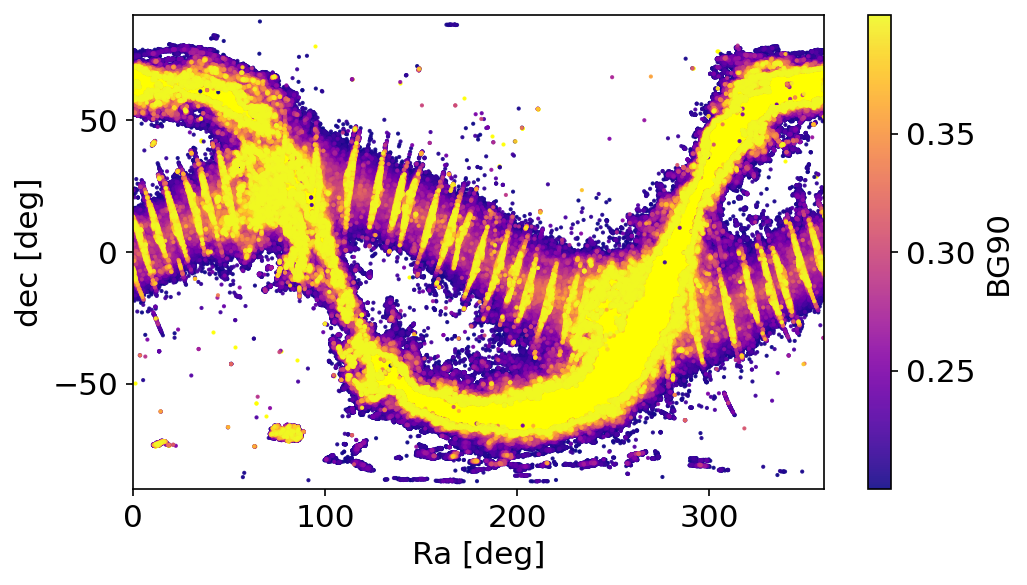

In [5]:
plot2('plasma', save=True)

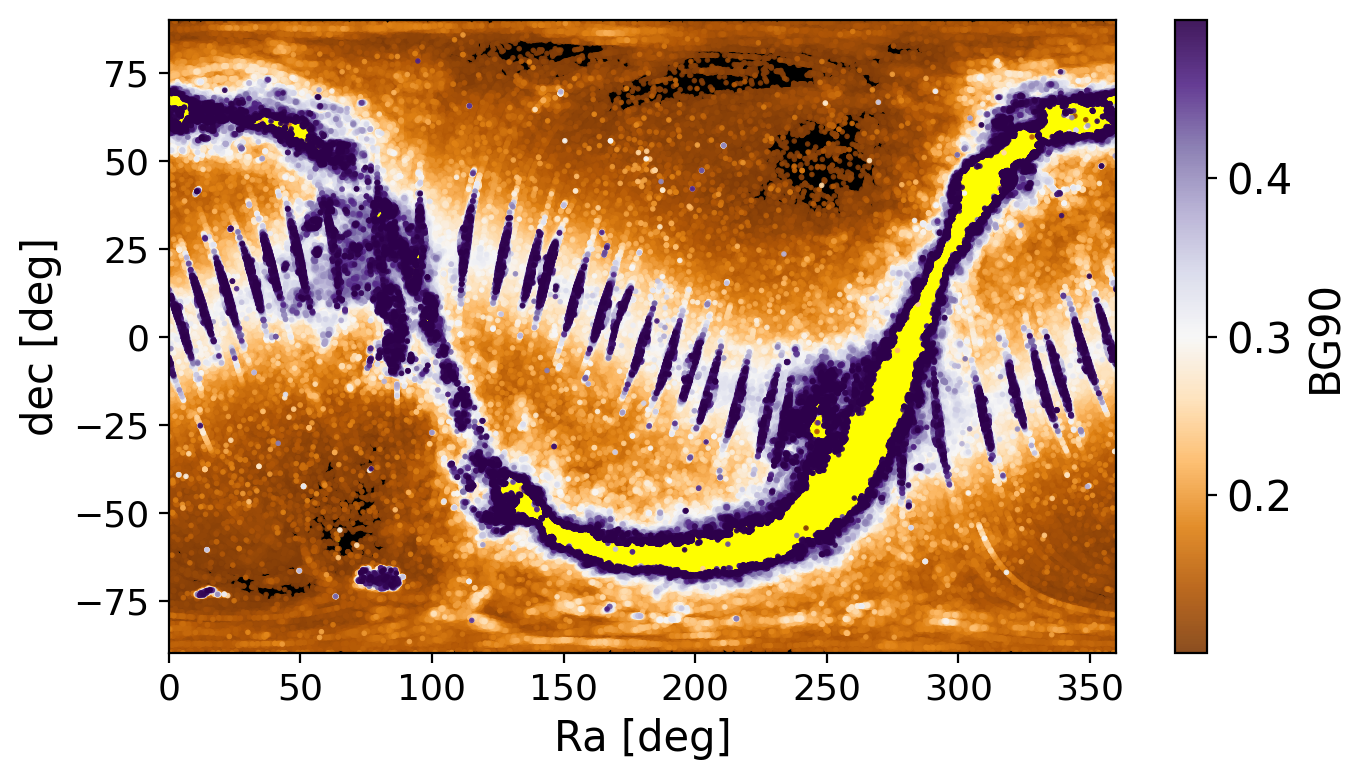

In [52]:
def bgplot(fc, save=False):
    
    data = listflux.loc[
        (listflux.BG90 > 0.1) & (listflux.BG90 < 0.5), 
        ['RA', 'DEC', 'BG90']
    ].sort_values(by='BG90', ascending=True)
    
    fighbg = listflux.loc[
        listflux.BG90 > 0.5, 
        ['RA', 'DEC', 'BG90']
    ]
    
    ra = data.RA
    dec = data.DEC 
    Z = data.BG90
    
    # if save == True:
    #     data.to_csv(f'./CentralDogma/4_Greed_/list3flux{fc}.csv')
    
    fig, ax = plt.subplots(figsize=(7, 4), dpi=200)
    
    ax.scatter(
        fighbg.RA, fighbg.DEC, c='yellow',
        s=1, 
        marker='o',
        alpha=0.9
    )
    scatter = ax.scatter(
        ra, dec, c=Z,
        s=1, 
        marker='o',
        alpha=0.9, cmap='PuOr'
        # norm=LogNorm()  # Apply logarithmic normalization
    )
    cbar = fig.colorbar(scatter, ax=ax, label='BG90')
    # cbar.norm = LogNorm()  # Apply logarithmic normalization to the colorbar if needed
    cbar.ax.tick_params(labelsize=15)  # Change colorbar tick label fontsize
    cbar.set_label('BG90', fontsize=15)  # Change colorbar label fontsize
    
    ax.set_facecolor('black')
    
    ax.set_xlabel('Ra [deg]', color='black', fontsize=15)
    ax.set_ylabel('dec [deg]', color='black', fontsize=15)
    ax.tick_params(axis='x', colors='black', labelsize=13)
    ax.tick_params(axis='y', colors='black', labelsize=13)
    # ax.legend()
    ax.set_xlim([0, 360])
    ax.set_ylim([-90, 90])
    
    plt.tight_layout()
    
    if save:
        plt.savefig('./louvre/bg90_0p3Ts.png', format='png', dpi=200, transparent=True)
    
    plt.show()

bgplot(0.3, 
    #  save=True
     )

### flux ratio

In [34]:
Data = pd.read_csv('./CentralDogma/3_Gluttony_/AKARI60IRAS_flux.csv')

(0.002, 3)

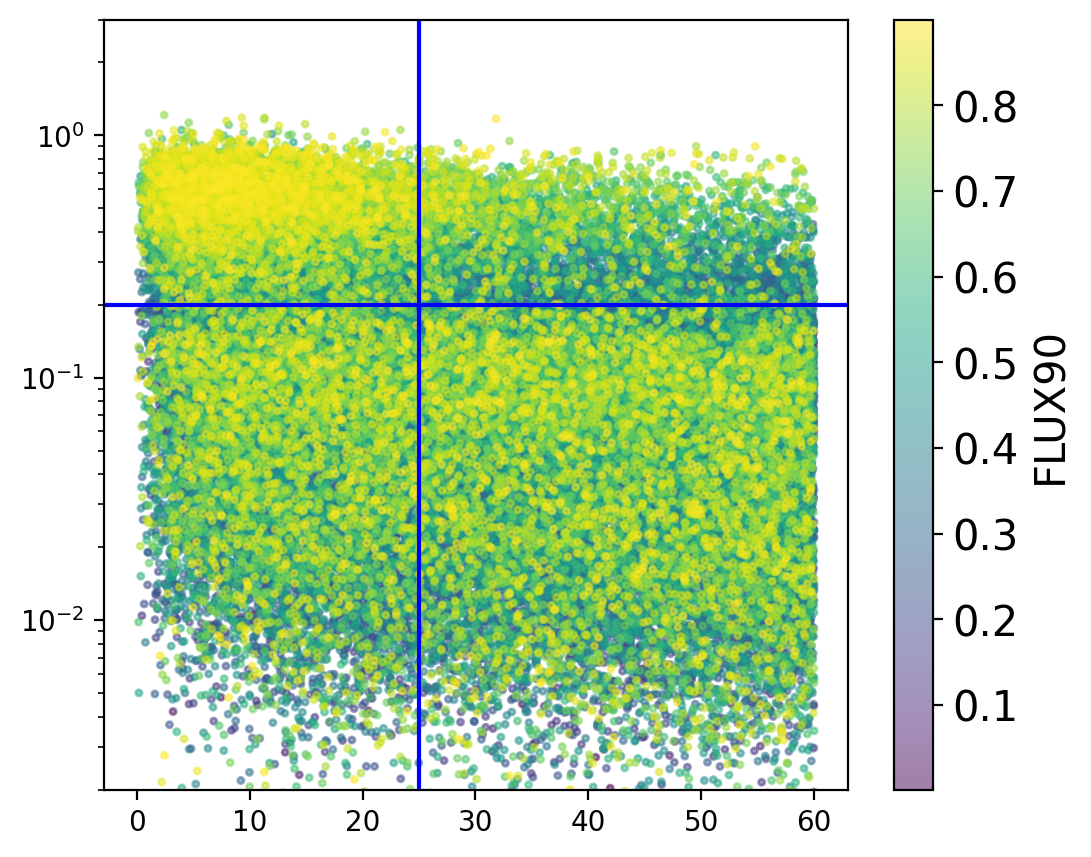

In [48]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)

data = Data.loc[Data.FLUX90<0.9].sort_values(by='FLUX90', ascending=True)

x = data['Separation']
y = data['ratio']
z = data['FLUX90']

mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

scatter = ax.scatter(
    x, y, c=z, s=5, alpha=0.5, cmap='viridis',
    edgecolors=None,
    # norm=LogNorm()
    )

cbar = fig.colorbar(scatter, ax=ax)
# cbar.norm = LogNorm()  # Apply logarithmic normalization to the colorbar if needed
cbar.ax.tick_params(labelsize=15)  # Change colorbar tick label fontsize
cbar.set_label('FLUX90', fontsize=15)  # Change colorbar label fontsize

ax.axvline(x=25, color='blue', linestyle='-', label="25'' separation")
ax.axhline(y=0.2, color='blue', linestyle='-', label="FLUX90/FLUX100 = 0.2")



ax.set_yscale('log')
ax.set_ylim(0.002, 3)

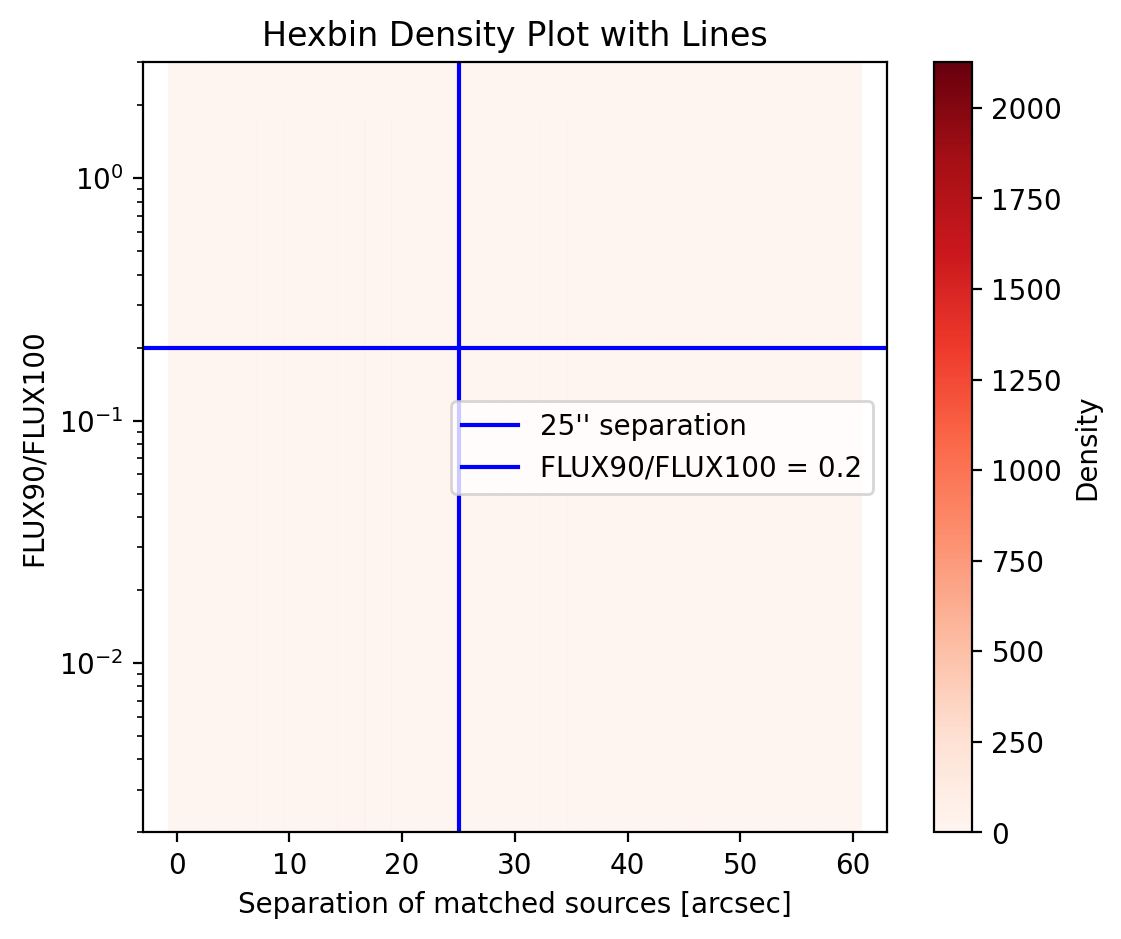

In [21]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)

x = data['Separation']
y = data['ratio']

mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

# Create hexbin plot
hb = ax.hexbin(x, y, gridsize=50, cmap='Reds')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Density')

# Add lines to the plot
ax.axvline(x=25, color='blue', linestyle='-', label="25'' separation")
ax.axhline(y=0.2, color='blue', linestyle='-', label="FLUX90/FLUX100 = 0.2")

# Add legend
ax.legend()

# Labels and title
ax.set_xlabel('Separation of matched sources [arcsec]')
ax.set_ylabel('FLUX90/FLUX100')
ax.set_title('Hexbin Density Plot with Lines')

# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.002, 3)

# Show plot
plt.show()

## Save

In [3]:
listv4 = pd.read_csv('./CentralDogma/9_Treachery_/list3v4.csv')

flux90 = listv4.FLUX90
bg90 = listv4.BG90

mask = (flux90>=bg90*3)
selected = listv4.loc[mask]
selected.to_csv('./CentralDogma/9_Treachery_/list3v5.csv', index=False)
len(selected)

988

In [4]:
listv5 = pd.read_csv('./CentralDogma/9_Treachery_/list3v5.csv')
mask = (listv5.MCONF90 != 1) & (listv5.NSCANC90>=2)
listv5.loc[mask].to_csv('./CentralDogma/9_Treachery_/list3v6.csv', index=False)
print(len(listv5.loc[mask]))

239


### old

In [1]:
listv4 = pd.read_csv('./CentralDogma/8_Fraud_/list3v4.csv')

flux90 = listv4.FLUX90
bg90 = listv4.BG90

mask = (bg90<0.3) & (flux90>=bg90*3)
selected = listv4.loc[mask]
selected.to_csv('./CentralDogma/9_Treachery_/list3v5.csv')
len(selected)

NameError: name 'pd' is not defined

In [7]:
listv5 = pd.read_csv('./CentralDogma/9_Treachery_/list3v5.csv')

In [3]:
list5.loc[list5.NSCANC90 == list5.NSCANP90]

Unnamed: 0    OBJID         OBJNAME         RA        DEC  POSERRMJ  \
2           136  5373329  0200517+071114  30.216083   7.186837       3.5   
3           167  5374163  0201069+040659  30.279514   4.116096       3.5   
4           174  5374300  0201092-191053  30.288926 -19.181791       3.5   
15          511  5380998  0203081+083332  30.784413   8.558505       3.5   
28         1167  5393573  0206528-110719  31.720468 -11.122167       3.5   
32         1406  5397842  0208091-191756  32.038560 -19.299306       3.5   
71         2684  5420265  0214407-180449  33.670092 -18.080625       3.5   
87         3072  5425931  0216171-100830  34.071696 -10.141916       3.5   
116        4585  5451620  0223392-073814  35.914025  -7.637653       3.5   
125        4949  5458120  0225326-180819  36.386572 -18.138802       3.5   
128        4991  5458771  0225442-193527  36.434576 -19.591062       3.5   
137        5306  5464400  0227180-170027  36.825642 -17.007788       3.5   
142        5657  5470512  0228598-123531  37.249742 -12.592274       3.5   
209        7982  5510381  0240208-181237  40.087450 -18.210601       3.5   
217        8328  5515852  0241569-191100  40.487568 -19.183662       3.5   
246        9368  5534637  0247143-175739  41.810172 -17.961204       3.5   
273       10163  5548247  0251022-100834  42.759596 -10.142970       3.5   
275       10317  5551189  0251530-164952  42.971342 -16.831419       3.5   
276       10323  5551300  0251548-150622  42.978886 -15.106557       3.5   
301       11217  5567137  0256151-194452  44.063466 -19.748244       3.5   
307       11546  5572044  0257338-050516  44.391531  -5.088170       3.5   
312       11767  5575544  0258291-175629  44.621915 -17.941614       3.5   
323       12335  5585292  0301032+054736  45.263843   5.793082       3.5   
329       12568  5589655  0302158-162509  45.566363 -16.419565       3.5   
333       12781  5593373  0303166-135112  45.819756 -13.853618       3.5   
350       13375  5603045  0305492-032835  46.455495  -3.476800       3.5   
357       13951  5611928  0308074-192703  47.031173 -19.451315       3.5   
363       14127  5614736  0308503-055517  47.210319  -5.921764       3.5   
371       14445  5619753  0310059-072028  47.525249  -7.341537       3.5   
372       14477  5620183  0310124-072924  47.552203  -7.490309       3.5   
379       14816  5625733  0311373-082242  47.905915  -8.378602       3.5   
384       15059  5629738  0312407-101357  48.170333 -10.232756       3.5   
391       15303  5633663  0313411-080152  48.421948  -8.031506       3.5   
394       15494  5637048  0314336-054424  48.640788  -5.740480       3.5   
396       15671  5640045  0315209-090900  48.837869  -9.150258       3.5   
407       16273  5648684  0317353-065032  49.397696  -6.842538       3.5   
422       16860  5657190  0319446-192011  49.936292 -19.336879       3.5   

     POSERRMI   POSERRPA         EPOCH  GRADE  ...      BG65      BG90  \
2         2.3  339.82144  2.453940e+06      2  ...  0.088711  0.267650   
3         2.3  339.71768  2.453939e+06      2  ...  0.097545  0.264122   
4         2.3  336.78012  2.454001e+06      2  ...  0.047122  0.142185   
15        2.3  339.97382  2.454084e+06      3  ...  0.091156  0.275572   
28        2.3  338.52120  2.454103e+06      2  ...  0.055607  0.139028   
32        2.3  337.04678  2.453931e+06      2  ...  0.052579  0.128301   
71        2.3  337.61390  2.454293e+06      2  ...  0.057208  0.153262   
87        2.3  339.12314  2.453938e+06      2  ...  0.052254  0.110921   
116       2.3  339.85773  2.453941e+06      2  ...  0.056147  0.075495   
125       2.3  338.14578  2.453937e+06      2  ...  0.039374  0.132776   
128       2.3  337.82443  2.454065e+06      2  ...  0.046500  0.128556   
137       2.3  338.48300  2.453938e+06      2  ...  0.043032  0.087326   
142       2.3  339.41200  2.454177e+06      2  ...  0.047963  0.121342   
209       2.3  338.96820  2.453941e+06      2  ...  0.051072  0.117489   
217   

In [9]:
mask = (listv5.MCONF90 != 1) & (listv5.NSCANC90>=2)
list5.loc[mask].to_csv('./CentralDogma/9_Treachery_/list3v6.csv')
print(len(list5.loc[mask]))

141


In [8]:
mask = (list5.NSCANC90 != list5.NSCANP90) | (list5.MCONF90 != 1)
# list5.loc[mask].to_csv('./CentralDogma/9_Treachery_/list3v6.csv')
# 426

141


In [18]:
list6 = pd.read_csv('./CentralDogma/9_Treachery_/old_list3v6.csv')

In [19]:
list6[['OBJID','RA','DEC', 'FLUX90', 'BG90']].sort_values('FLUX90')[-10:]
# list6[['FLUX65','FLUX90','FLUX140','FLUX160',]].sort_values('FLUX90')[:10]

OBJID         RA        DEC    FLUX90      BG90
363  5619658  47.519990 -16.517694  3.331097  0.133793
118  5454338  36.113314 -17.417109  3.424374  0.087872
292  5564736  43.904950 -12.988342  3.570285  0.113972
154  5480695  37.966766  -9.382093  3.582802  0.162994
285  5561131  43.660183 -16.346856  4.321516  0.141960
145  5474777  37.548877  -5.652221  5.160554  0.155142
36   5401237  32.294578   5.256336  5.661844  0.229950
143  5474476  37.526990 -15.738040  6.439498  0.143823
367  5623120  47.734241 -11.296901  6.571809  0.176982
136  5468968  37.140931 -15.202940  9.572477  0.105401

In [20]:
top10 = list6.sort_values('FLUX90')[-10:]
top10.to_csv('./CentralDogma/9_Treachery_/top10_old.csv')

In [10]:
list6['SNR'] = list6['FLUX90'] / list6['BG90']  # Calculate the signal-to-noise ratio

# Select the columns with top 10 SNR
list6[['OBJID', 'RA', 'DEC', 'FLUX90', 'BG90', 'SNR']].sort_values('SNR')[-20:]

OBJID         RA        DEC    FLUX90      BG90        SNR
14   5386650  31.207829 -14.588197  2.699723  0.150122  17.983516
230  5530771  41.542503 -15.861242  2.650923  0.142109  18.654191
346  5609558  46.875215 -10.810901  3.174242  0.160736  19.748132
89   5427865  34.214627 -15.346439  3.017005  0.147513  20.452415
94   5431727  34.491641 -13.192990  2.567558  0.120419  21.321893
353  5612834  47.088185 -15.257578  3.316707  0.154626  21.449824
313  5580524  44.947000 -18.691356  2.766162  0.128945  21.452237
154  5480695  37.966766  -9.382093  3.582802  0.162994  21.981215
359  5616092  47.297102 -15.764776  3.175092  0.139918  22.692575
323  5590283  45.611811 -16.489164  2.692581  0.115328  23.347103
171  5485773  38.322946 -15.832534  2.732636  0.113889  23.993820
36   5401237  32.294578   5.256336  5.661844  0.229950  24.622037
363  5619658  47.519990 -16.517694  3.331097  0.133793  24.897448
285  5561131  43.660183 -16.346856  4.321516  0.141960  30.441822
292  5564736  43.904950 -12.988342  3.570285  0.113972  31.326031
145  5474777  37.548877  -5.652221  5.160554  0.155142  33.263511
367  5623120  47.734241 -11.296901  6.571809  0.176982  37.132597
118  5454338  36.113314 -17.417109  3.424374  0.087872  38.969816
143  5474476  37.526990 -15.738040  6.439498  0.143823  44.773702
136  5468968  37.140931 -15.202940  9.572477  0.105401  90.819224

In [23]:
n = 0.14
x=list6.loc[(list6.BG90>n)&(list6.BG90<n+0.01)]
x[['OBJID','RA','DEC', 'FLUX90', 'BG90']]

OBJID         RA        DEC    FLUX90      BG90
1    5372954  30.188770 -12.109138  0.982874  0.146173
5    5375270  30.360409 -15.060910  1.265316  0.142697
9    5377715  30.543464 -12.337805  0.531264  0.145229
11   5378261  30.582043 -16.630572  0.451066  0.147421
16   5387250  31.252776 -14.215345  0.435488  0.143523
..       ...        ...        ...       ...       ...
379  5631691  48.294392 -15.798809  0.502571  0.140267
397  5648684  49.397696  -6.842538  0.907834  0.148202
403  5651578  49.583847 -13.775461  0.501436  0.148259
408  5654178  49.743995  -7.917353  0.482086  0.149020
411  5655777  49.844165 -13.761180  0.568007  0.148848

[74 rows x 5 columns]

## Motion and Flux

### Flux

$$
\frac{4}{3}\pi R^3 \rho = M \\
\Omega = \frac{A}{r^2}sr\\
A = \pi R^2\\
Flux90 = 7*10^{-5}*\Omega [W/m^2/\mu m], T=30K\\
Flux90 = 8.3*10^{-4}*\Omega [W/m^2/\mu m], T=55K\\
Jy = Flux90*10^{26}*\frac{\lambda^2}{c}
$$

In [2]:
def flux(M, D, T):
    
    '''
    M: mass in earth mass
    m: mass in gram
    D: distance in AU
    r: distance in cm
    rho: density in g/cm3
    F: flux in jansky
    '''
    rho = 1.454
    m = M*6*10**(27)
    r = D*1.5*10**(13)
    
    # emissivity = 0.71
    if T==55:
        Teff = 8.3*10**(-4)
    if T==50:
        Teff = 0.00061
    if T==30:
        Teff = 7*10**(-5)
        
    # emissivity = 1
    if T==53:
        Teff = 0.00103
    if T==28:
        Teff = 6.7*10**(-5)
    
    # Teff = 2*10**(-7)
    
    R = (3*m/(4*3.14*rho))**(1/3)
    
    A = 3.14*R*R
    # A = 7.62*10**(19)
    
    F = 10**(26)*90*9*10**(-5)/(3*10**(8))*Teff*A/(r*r)
    # F = 10**(26)*1000*100*10**(-5)/(3*10**(8))*Teff*A/(r*r)
    
    return F 

In [3]:
candi = pd.read_csv('./CentralDogma/9_Treachery_/old_list3v6.csv')
sources = pd.read_csv('./CentralDogma/1_Limbo_/list3flux.csv')

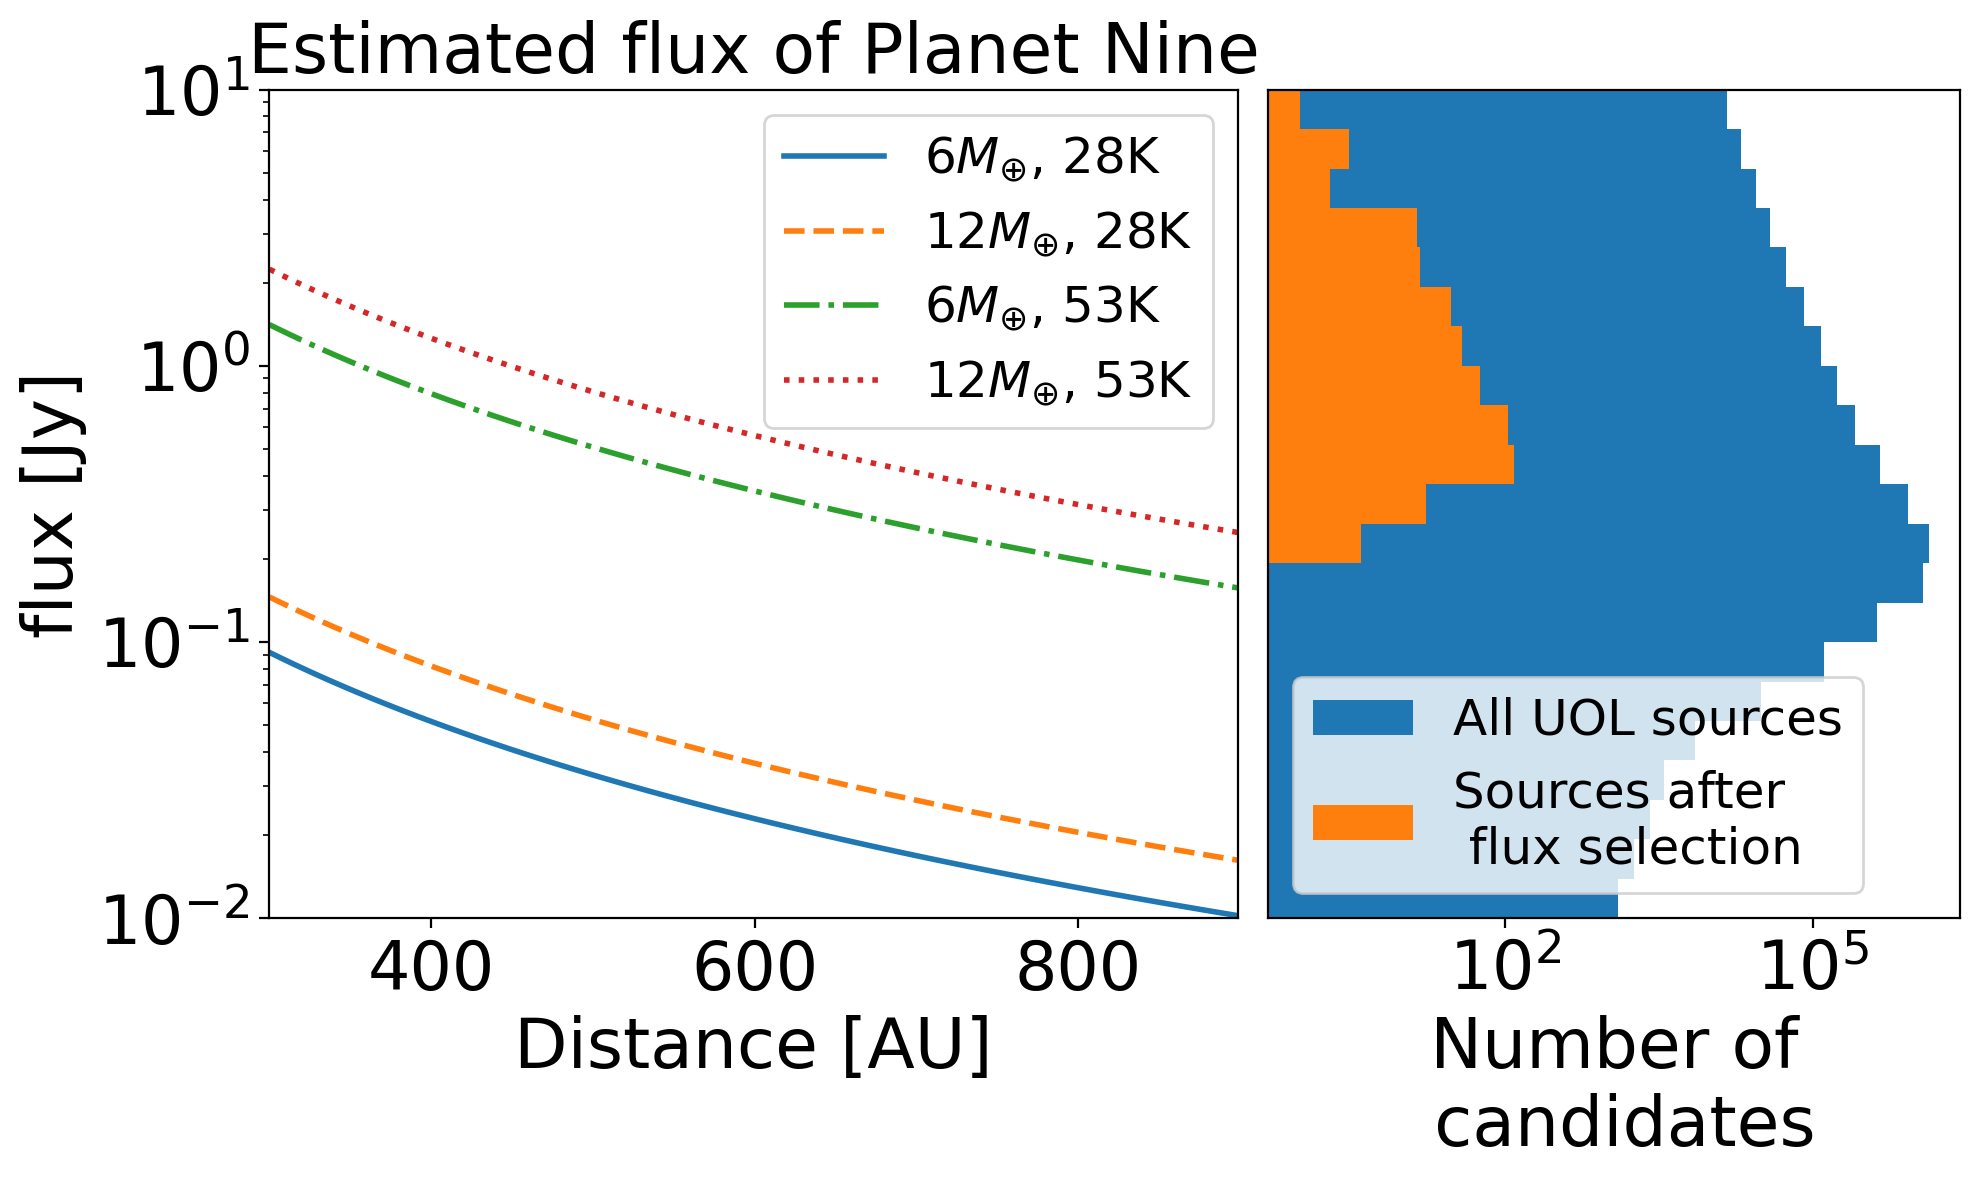

In [30]:
fig , ax=plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [0.7, 0.5]}, dpi=200)

range=[300, 899]

x = np.linspace(range[0], range[1], 100)

ax[0].plot(
    x, flux(6, x, 28),
    lw=2,
    label = r'$6M_{\oplus}$, 28K'
)
ax[0].plot(
    x, flux(12, x, 28),
    lw=2,
    label = r'$12M_{\oplus}$, 28K',
    ls='--'
)
ax[0].plot(
    x, flux(6, x, 53),
    lw=2,
    label = r'$6M_{\oplus}$, 53K',
    ls='-.'
)
ax[0].plot(
    x, flux(12, x, 53),
    lw=2,
    label = r'$12M_{\oplus}$, 53K',
    ls=':'
)

ax[0].legend(fontsize=18)
ax[0].set_xlim(range[0], range[1])
ax[0].set_yscale('log')
ax[0].set_ylim(10**(-2), 10**(1))

ax[0].set_xlabel('Distance [AU]', fontsize=25)
ax[0].set_ylabel('flux [Jy]', fontsize=25)

ax[0].set_title('Estimated flux of Planet Nine', fontsize=25)
ax[0].tick_params(axis='both', labelsize=24)

ax[1].hist(
    np.log10(sources.FLUX90), bins=np.linspace(-2, 1, 22), orientation="horizontal", log=True, label='All UOL sources'
)
ax[1].hist(
    np.log10(candi.FLUX90), bins=np.linspace(-2, 1, 22), orientation="horizontal", log=True, label='Sources after \n flux selection'
)

ax[1].legend(fontsize=18)
ax[1].set_ylim(-2, 1)
ax[1].set_yticks([])
ax[1].set_xlabel(' Number of \n candidates', fontsize=25)

# ax[1].set_title('AKARI P9 Candidates')
ax[1].tick_params(axis='both', labelsize=24)

plt.subplots_adjust(wspace=0.05)

plt.tight_layout()
plt.show()

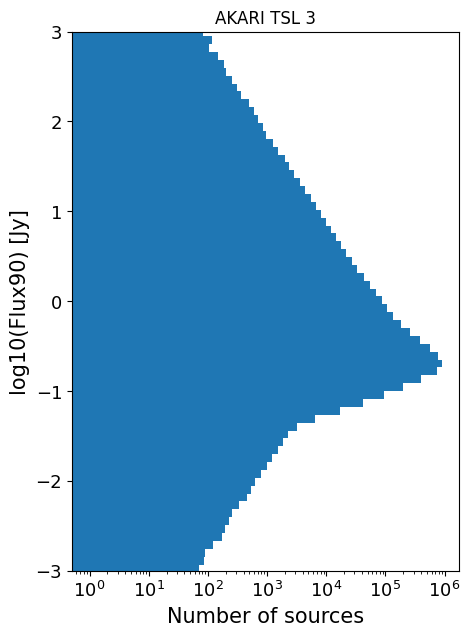

In [45]:
fig , ax=plt.subplots(figsize=(5, 7))

ax.hist(
    np.log10(sources.FLUX90), bins=100, orientation="horizontal", log=True
)
ax.set_ylim(-3, 3)
# ax[2].set_yticks([])
ax.set_xlabel('Number of sources', fontsize=15)
ax.set_ylabel('log10(Flux90) [Jy]', fontsize=15)

ax.set_title('AKARI TSL 3')
ax.tick_params(axis='both', labelsize=13)

plt.subplots_adjust(wspace=0.05)

plt.show()

### Expected Motion

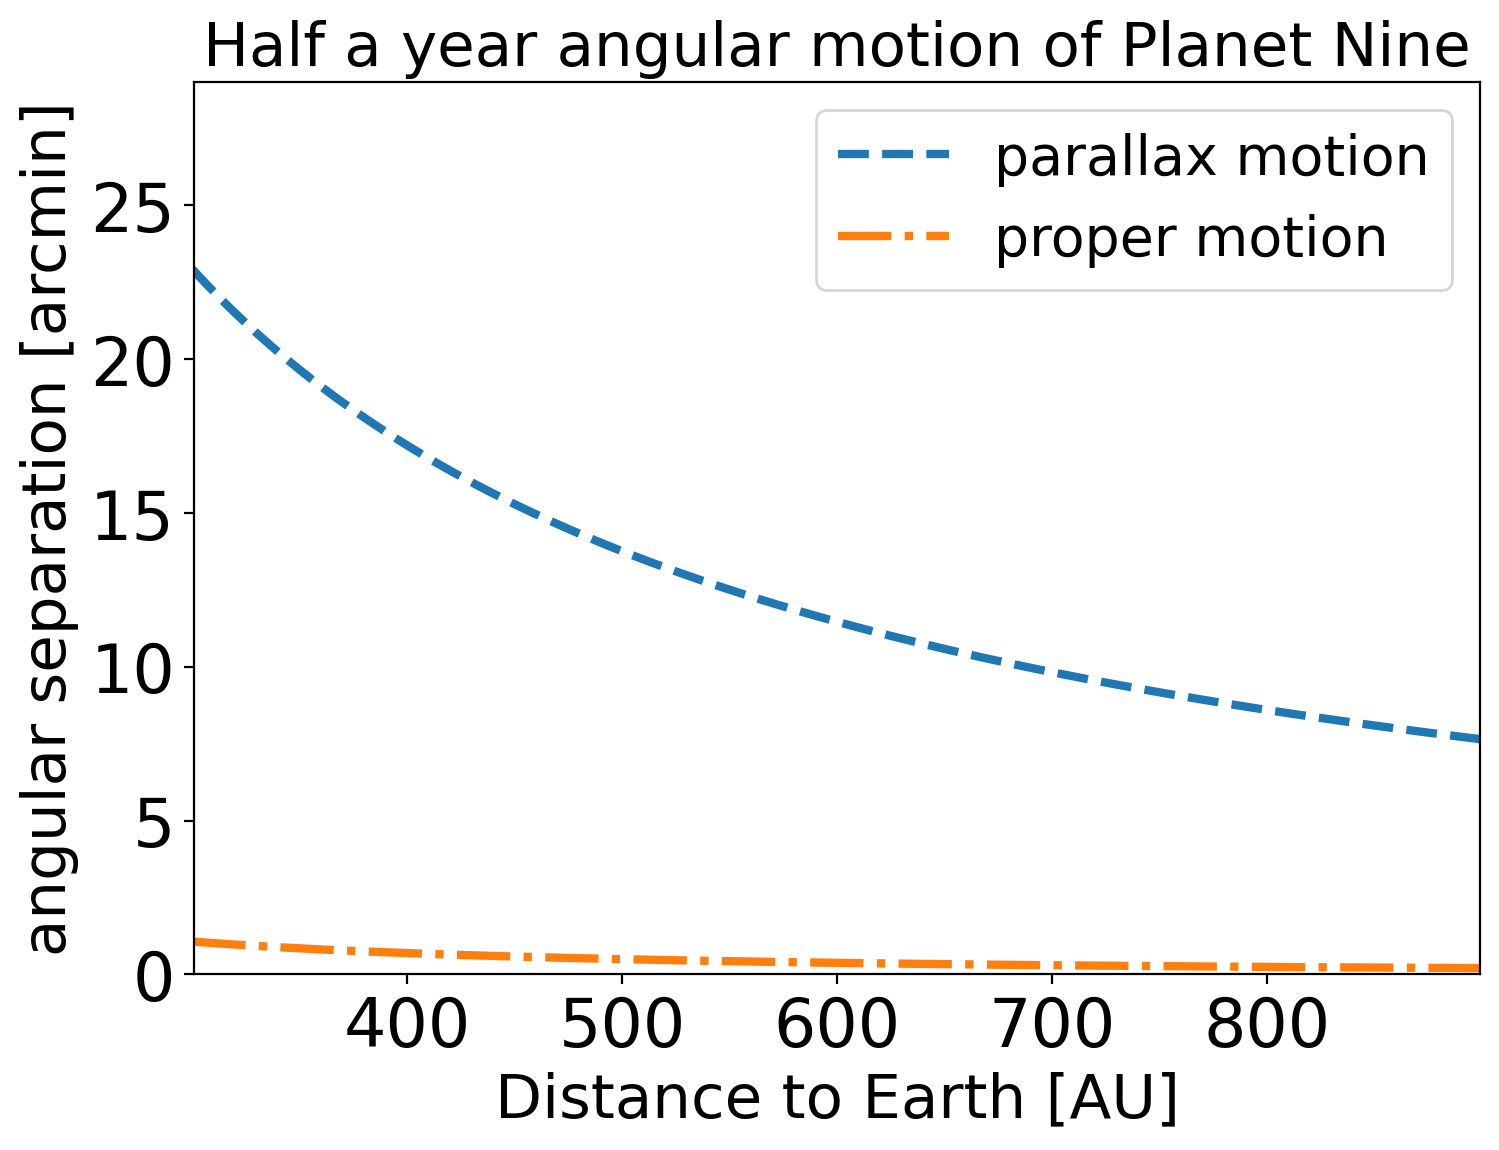

In [5]:
def propmotion(d):
    
    # print(
    #     'Half year:', (2/d)*360/(2*np.pi) , '\n'
    #     'One day:',(2/d)*360*60*60/180/(2*np.pi)
    # )
    
    return (2/d)*360*60/(2*np.pi), 18/60*((d/700)**(-3/2))
    
fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=200)

x = np.linspace(300, 900, 100)
y = propmotion(x)

plt.plot(x, y[0], label='parallax motion', linestyle='--', lw=3)
plt.plot(x, y[1], label='proper motion', linestyle='-.', lw=3)
# plt.plot(x, y[1]+y[0], label='angular motion',  lw=3)

plt.legend(fontsize=20)

plt.ylim(0, 30-1)
plt.xlim(300+1, 900-1)
# adjust the tight layout
plt.tight_layout() 
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.ylabel('angular separation [arcmin]', fontsize=22)
plt.xlabel('Distance to Earth [AU]', fontsize=22)
plt.title('Half a year angular motion of Planet Nine', fontsize=22)

plt.show()

In [3]:
propmotion(300)

(22.918311805232936, 1.0692676621563626)

### linked velosity

In [17]:
data = pd.read_csv('./CentralDogma/9_Treachery_/list3v6.csv')
Time = data["MJD"].loc[data["MJD"]>50000]
Ra = data["RA"].loc[data["MJD"]>50000]
Dec = data["DEC"].loc[data["MJD"]>50000]
f90 = data['FLUX90'].loc[data["MJD"]>50000]
ferr90 = data['FERR90'].loc[data["MJD"]>50000]

# coor = SkyCoord(ra=Ra, dec=Dec, unit=(u.deg, u.deg), frame='icrs')

# for i in range(len(coor)):
#     for j in range(i+1, len(coor)):
#         if coor[i].separation(coor[j])<24*u.arcmin:
#             print(i, j)

In [21]:
# sort Ra by the f90/ferr90

data = pd.read_csv('./CentralDogma/9_Treachery_/list3v6.csv')
data['SNR'] = data['FLUX90'] / data['FERR90']
data = data.sort_values('SNR').loc[data["MJD"]>50000]

print(data[['OBJNAME', 'SNR']][-20:])

            OBJNAME        SNR
73   0246175-112515   7.951907
124  0314336-054424   8.209056
8    0206127-180216   8.245927
75   0246541-154720   8.459003
78   0247349-115658   8.728168
67   0242046-023629   8.960926
122  0312407-101357   9.353145
89   0253120-144115   9.510396
28   0216004-104508  10.737099
6    0204508-151945  10.976319
2    0201069+040659  11.161312
138  0318556-123900  11.904325
72   0245393+055127  13.647756
86   0251548-150622  13.729706
100  0301032+054736  14.459104
1    0200517+071114  15.426341
80   0248038-000824  23.032236
45   0225401+122635  30.441760
61   0233238+183014  37.289775
117  0309386+052859  64.684848


### old something

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

x = [0.01, 2]
y = [0.01, 2]


plt.plot(x, y)

plt.title('list2')
plt.xlabel('Dstance [pc]')
plt.ylabel('Estimated flux')
# plt.yscale('log')
# plt.xscale('log')

plt.show()

In [22]:
listv5 = pd.read_csv('./CentralDogma/4_Greed_/list3v5.csv')
# listv6 = listv5.loc[listv5.GRADE == 3]
top10 = listv5.sort_values(by='FLUX90', ascending=False).head(15)

In [12]:
listv6 = listv5.loc[listv5.GRADE == 3]
listv6.to_csv('./CentralDogma/6_Heresy_/list2v6.csv')

In [ ]:
listv5 = pd.read_csv('./CentralDogma/4_Greed_/list2v5.csv')

flux = listv5.FLUX90
bg = listv5.BG90

mask = flux>=bg*5

v6 = listv5.loc[mask]

In [8]:
print(v6)

      Unnamed: 0  OBJID_1         OBJNAME       RA_1      DEC_1  POSERRMJ_1  \
51            69  5060008  0200452-120632  30.188770 -12.109138         3.5   
52            70  5060010  0200455-120918  30.190261 -12.155340         3.5   
120          164  5060508  0201448-145104  30.437138 -14.851479         3.5   
331          461  5061917  0204368-115943  31.153765 -11.995458         3.5   
344          478  5062016  0204470-141132  31.196491 -14.192601         3.5   
...          ...      ...             ...        ...        ...         ...   
4462        7477  5098064  0316203-033610  49.085163  -3.603112         3.5   
4519        7593  5098651  0317285-163002  49.369248 -16.500798         3.5   
4523        7602  5098711  0317353-065032  49.397696  -6.842538         3.5   
4533        7618  5098782  0317427-163723  49.428455 -16.623276         3.5   
4619        7796  5099536  0318556-123900  49.732258 -12.650471         3.5   

      POSERRMI_1  POSERRPA_1         EPOCH  GRADE  

### bg

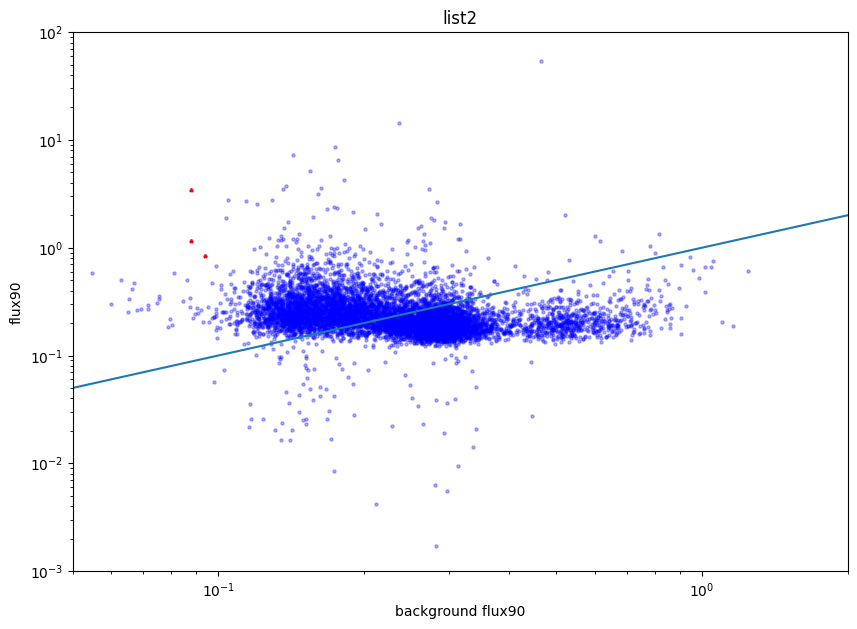

In [27]:
fig, ax = plt.subplots(figsize=(10,7))

x1 = [0.01, 2]
y1 = [0.01, 2]

plt.scatter(
     bg90, flux90,
     color = 'blue',
     s = 5,
     marker = "o",
     alpha = 0.3
)

plt.scatter(
     selected.BG90, selected.FLUX90,
     color = 'red',
     s = 10,
     marker = "2"
)

plt.plot(x1, y1)

plt.xlim([0.05, 2])
plt.ylim([0.001, 100])

plt.title('list2')
plt.xlabel('background flux90')
plt.ylabel('flux90')
plt.yscale('log')
plt.xscale('log')

plt.show()

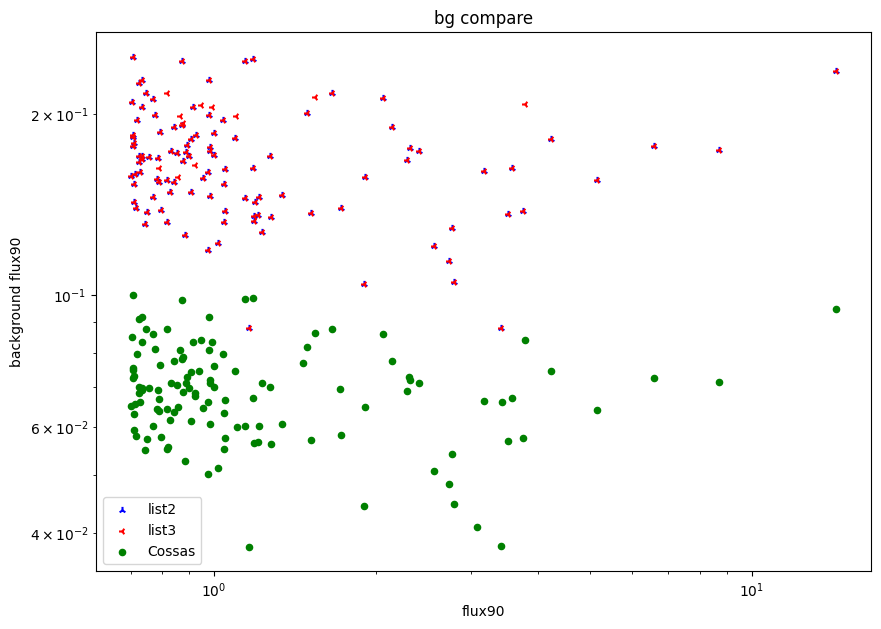

In [12]:
cossas = pd.read_csv('./CentralDogma/3_Gluttony_/cossas_allv2.csv')
list2 = pd.read_csv('./CentralDogma/3_Gluttony_/list2v4xCossas.csv')
list3 = pd.read_csv('./CentralDogma/3_Gluttony_/list3v4xCossas.csv')

fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(
     list2.FLUX90, list2.BG90,
     color = 'blue',
     s = 27,
     marker = "2",
     label = 'list2'
)

plt.scatter(
     list3.FLUX90, list3.BG90,
     color = 'red',
     s = 25,
     marker = "3",
     label = 'list3'
)

plt.scatter(
     cossas.FLUX90, cossas.BG90,
     color = 'green',
     s = 20,
     marker = "o",
     label = 'Cossas'
)

ax.legend()

# plt.xlim([0.05, 2])
# plt.ylim([0.001, 100])

plt.title('bg compare')
plt.ylabel('background flux90')
plt.xlabel('flux90')
plt.yscale('log')
plt.xscale('log')

plt.show()

### Position

In [7]:
alldata = pd.read_csv(
    './CentralDogma/3_Gluttony_/cossas_all_constrains.csv'
    # '/mnt/c/Users/User/Downloads/p9_can/list2_ra_dec.csv'
    # ,compression='gzip'
    # ,sep='  *'
    # ,names=['dd']
    # usecols=
)

mask = (alldata.RA>30) & (alldata.RA<50) & (alldata.DEC>-20) & (alldata.DEC<20)

data = alldata.loc[mask]

In [9]:
data.to_csv('./CentralDogma/3_Gluttony_/cossas_allv2.csv')

In [8]:
len(data.RA)

122

In [12]:
data.to_csv('/mnt/c/Users/User/Downloads/p9_can/list2v2_ra_dec.csv')

In [2]:
dataq = pd.read_csv('/mnt/c/Users/User/Downloads/1sec/list2-2MASSxPS1.csv')

In [25]:
ra = dataq.RA
dec = dataq.DEC

raq = []
for i in range(20301):
    raq.append(ra[i+1]-ra[i])
    if raq[i] <= 0:
        # print(raq[i])
        print(i)

# rax1

83
131
149
191
469
494
574
610
636
678
680
769
1059
1069
1072
1089
1189
1198
1203
1225
1257
1261
1337
1354
1399
1461
1538
1668
1869
1882
1975
2039
2048
2131
2140
2238
2247
2249
2251
2252
2254
2269
2277
2290
2310
2341
2348
2372
2400
2422
2429
2451
2460
2559
2607
2653
2656
2723
2753
2754
2787
2882
2906
2973
3035
3054
3120
3142
3190
3231
3251
3271
3275
3512
3629
3632
3695
3728
3803
3825
3862
4141
4165
4168
4272
4325
4532
4663
4725
4767
4797
4813
4907
4912
4959
5155
5480
5537
5539
5628
5675
5770
5855
5872
5967
5996
6050
6069
6194
6261
6284
6368
6376
6411
6419
6454
6525
6570
6600
6693
6738
6928
6931
7150
7171
7247
7376
7425
7435
7547
7550
7668
7670
7671
7826
7902
7965
7975
8043
8051
8263
8332
8364
8412
8437
8519
8583
8632
8642
8678
8815
8818
8823
9198
9233
9294
9320
9413
9428
9440
9612
9655
9669
9710
9833
9846
9943
9996
10020
10048
10077
10095
10238
10254
10428
10565
10745
10958
10969
10982
11116
11528
11540
11558
11592
11704
11878
11950
12007
12446
12473
12516
12540
12638
12723
12820
12848

In [2]:
Cat1 = fits.open('./CentralDogma/1_Limbo_/FISBSCv2_drateGT0_20220131.fits.gz')  # list 3
Cat2 = fits.open('./CentralDogma/1_Limbo_/FISBSCv2_noMCONF_20220129.fits.gz')   # list 2

# remember to close it?

In [4]:
Cat1[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6a           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  164 /Number of bytes per row                         
NAXIS2  =              5274338 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   47 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'FIS_BSC '           / Extention Name                                 
COMMENT                     

In [5]:
Cat2[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6a           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  164 /Number of bytes per row                         
NAXIS2  =               996342 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   47 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'FIS_BSC '           / Extention Name                                 
COMMENT                     

In [10]:
Cat2[1].data[0]

(5000001, '2359599-562456', 0.0005505699213916301, -56.415869929208725, 3.5, 2.3, 321.9114, 2454024.4130555354, 3, 0.03750745, 0.18310973, 0.08256541, nan, 0.20126632, 0.052039884, 0.21616918, nan, 1, 3, 1, 1, 0, 0, 0, 4, 1, 2, 1, 0, 6, 6, 9, 9, 0, 0, 0, 0, 0.032206547, 0.11483217, 0.07948851, 0.22151698, nan, 0.36555663, nan, nan, 90, 1)

In [12]:
Cat2[1].data[0][1]

14

## Crossmatching

### bright sources for x match

In [3]:
list3 = pd.read_csv('./CentralDogma/1_Limbo_/list3_90um.csv')

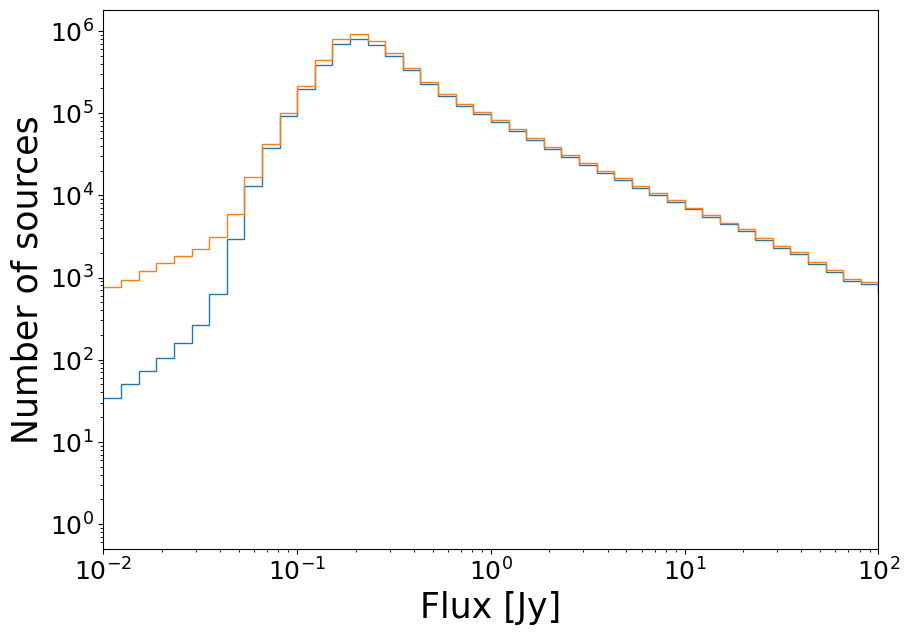

In [18]:
fig, ax = plt.subplots(figsize=(10,7))

bin = np.logspace(np.log10(1e-4),np.log10(1e5),100)

ax.hist(
    list3.loc[list3['NSCANC90']>1, 'FLUX90'], bins=bin, histtype='step'
)
ax.hist(
    list3['FLUX90'], bins=bin, histtype='step'
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 1e2)

ax.set_xlabel('Flux [Jy]', fontsize=25)
ax.set_ylabel('Number of sources', fontsize=25)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.show()

In [15]:
list3.loc[list3.FLUX90>0.2].to_csv('./CentralDogma/1_Limbo_/list3_brightsources.csv')
list3.loc[list3.NSCANC90>1].to_csv('./CentralDogma/1_Limbo_/list3_hdetect.csv')

In [6]:
# data1 = pd.read_csv('./CentralDogma/1_Limbo_/list3_brightsources.csv')
data2 = pd.read_csv('./CentralDogma/1_Limbo_/list3_hdetect.csv')

In [5]:
data1.loc[
    (data1.RA<50)&(data1.RA>30)&(data1.DEC>-20)&(data1.DEC<20)
].to_csv('./CentralDogma/2_Lust_/list3v2_brightsources.csv', index=False)

In [7]:
data2.loc[
    (data2.RA<50)&(data2.RA>30)&(data2.DEC>-20)&(data2.DEC<20)
].to_csv('./CentralDogma/2_Lust_/list3v2_hdetect.csv', index=False)

### radial gaussian fitting

In [2]:
files = '/home/amos/planet_9/CentralDogma/2_Lust_/'

filename = [
    '3-2MASSv2.csv', '3-NOMADv2.csv', '3-PS1v2.csv', '3-ALLWISEv2.csv',
    '3-WISEv2.csv', '3-SIMBADv2.csv',
    '3-CatWISEv2.csv', '3-unWISEv2.csv',
    '3-SDSS16v2.csv', 
    '3-IRASv2.csv', '3-IRAS_psc_allsky.csv', '3-IRAS_fscv2.csv', '3-IRAS_fsc_allsky.csv',
    '3-IRAS_psc_allsky_proper.csv'
]

cname = [['RAJ2000','DEJ2000'], ['RAJ2000','DEJ2000'], ['RAJ2000','DEJ2000'], ['RAJ2000','DEJ2000'],
         ['ra_2a','dec_2a'], ['ra_2a','dec_2a'], 
         ['RAdeg', 'DEdeg'], ['RAdeg', 'DEdeg'], 
         ['RA_ICRS','DE_ICRS'], 
         ['ra_2','dec_2'], ['ra_2','dec_2'], ['ra_2','dec_2'], ['ra_2','dec_2'], ['ra_2','dec_2']]

r = [
    6.66,
    7.05,
    8.04,
    9.53,
    10.35,
    4.24,
    6.85,
    6.63,
    6.36,
    6.55,
    9.41,
]

In [ ]:
50033
47140
43640
35228
27758
26130
26109
22825
22436
21457
21454

9.412365496604693


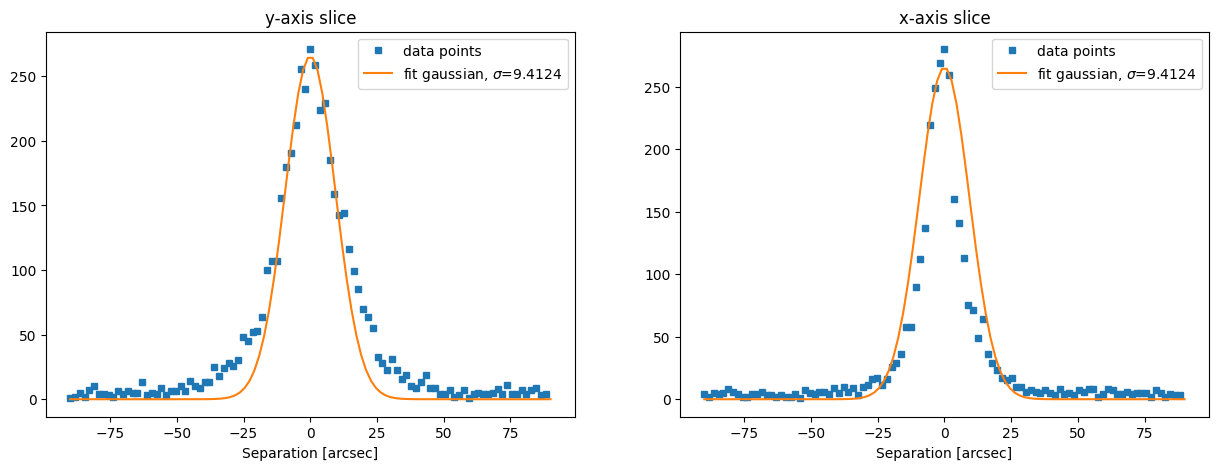

9.412365496604693

In [14]:
num = 12
fnum = num
cnum = num
w = 1.1

CrossmatchDisfit(files+filename[fnum], cname[cnum],
                fitrange=90, grid=101, weight=w, mode=3)

In [4]:
data = pd.read_csv(files+filename[3])

n1 = cname[3][0]
n2 = cname[3][1]

x = (data.RA-data[n1])*3600*np.cos(data.DEC*np.pi/180)
y = (data.DEC-data[n2])*3600

model = ExpressionModel(
    'amp*exp(-(x**2 / (2*sig**2)) - (y**2 / (2*sig**2)))',
    independent_vars=['x', 'y']
)
params = model.make_params(amp=100, sig=1)

fitrange = 90
grid = 101

xedges = yedges = np.linspace(-fitrange, fitrange, grid)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
z = H.flatten()

X, Y = np.meshgrid(np.linspace(-fitrange, fitrange, grid-1), np.linspace(-fitrange, fitrange, grid-1))
xf, yf = X.flatten(), Y.flatten()

w = z**1.1
result = model.fit(z, x=xf, y=yf, params=params,
                   weights=w
                   )
result

In [43]:
result.params['sig'].value

9.535273826109925

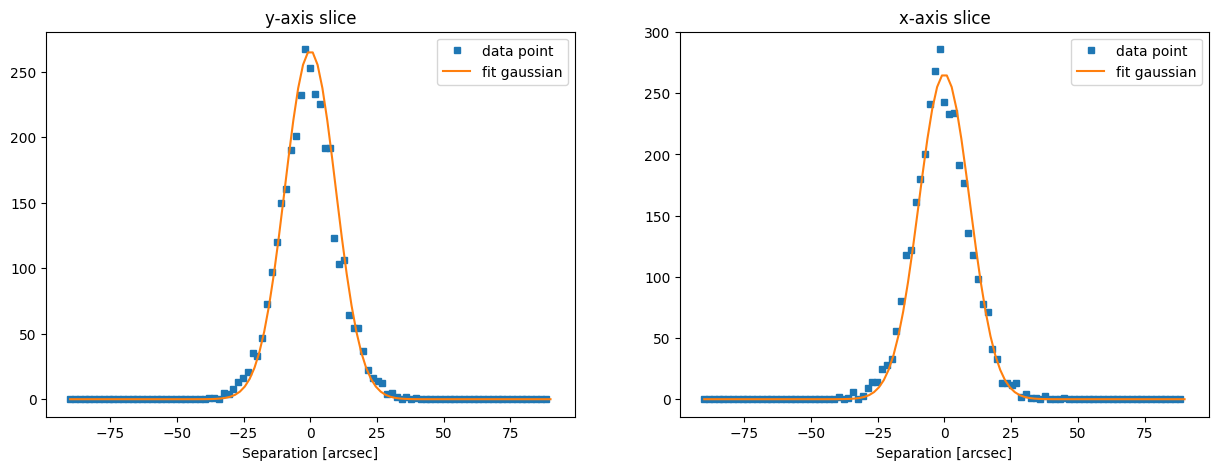

In [35]:

Z = griddata((xf, yf), z, (X, Y), method='linear', fill_value=0)
Zx = Z[int((grid+1)/2)]
Zy = Z.T[int((grid+1)/2)]

fig, axs=plt.subplots(1, 2, figsize=(15, 5), dpi=100)

ax = axs[0]
ax.plot(xedges[:grid-1], Zx, 
        marker='s', markersize=5, ls='', label='data point'
        )
ax.plot(np.linspace(-90, 90, 100),
        model.eval(result.params, x=np.linspace(-90, 90, 100), y=0),
        label='fit gaussian')
ax.set_title('y-axis slice')
ax.set_xlabel('Separation [arcsec]')
ax.legend()

ax=axs[1]
ax.plot(yedges[:grid-1], Zy, 
        marker='s', markersize=5, ls='', label='data point'
        )
ax.plot(np.linspace(-90, 90, 100),
        model.eval(result.params, x=0, y=np.linspace(-90, 90, 100)),
        label='fit gaussian')
ax.set_title('x-axis slice')
ax.set_xlabel('Separation [arcsec]')
ax.legend()


In [27]:
num = 3
fnum = num
cnum = num
w = 1.1

CrossmatchDisfit(files+filename[fnum], cname[cnum],
                fitrange=90, grid=101, weight=w, mode=3)
# CrossmatchDisfit2G(filename[fnum], cname[cnum], fitrange=70, grid=121, weight=w)

NameError: name 'rf' is not defined

In [2]:
tsl3xsimbad = pd.read_csv('./CentralDogma/2_Lust_/3-SIMBADv2.csv')
tsl3xallwise = pd.read_csv('./CentralDogma/2_Lust_/3-ALLWISEv2.csv')

/tmp/ipykernel_91908/3097103582.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  Poisson = lambda x, k: (np.exp(-k)*k**x)/np.math.factorial(x)


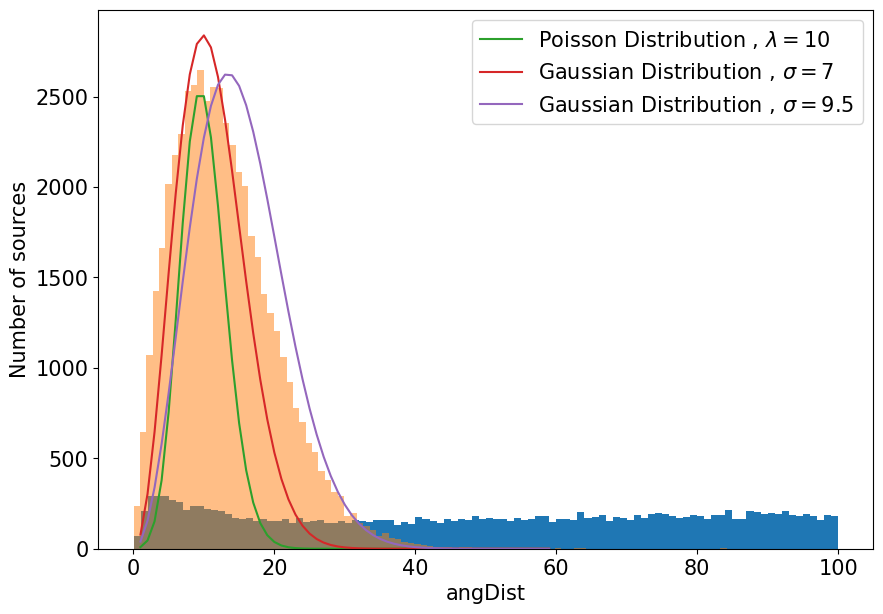

In [52]:
Poisson = lambda x, k: (np.exp(-k)*k**x)/np.math.factorial(x)
Gaussian = lambda x, amp, sig: (amp / (np.sqrt(2*np.pi) * sig)) * np.exp(-(x)**2 / (2*sig**2))

fig, ax = plt.subplots(figsize=(10,7))

ax.hist(
    tsl3xsimbad.angDist, bins=100, orientation="vertical",
    # log=True
)

ax.hist(
    tsl3xallwise.angDist, bins=100, orientation="vertical",
    alpha = 0.5
    # log=True,
)

x = list(range(1, 60))

ax.plot(x, [20000*Poisson(i, 10) for i in x],
         label=r'Poisson Distribution , $\lambda=$10')
ax.plot(x, [Gaussian(i, 220, 7)*6.28*i**2 for i in x],
            label=r'Gaussian Distribution , $\sigma=$7')
ax.plot(x, [Gaussian(i, 150, 9.5)*6.28*i**2 for i in x],
            label=r'Gaussian Distribution , $\sigma=$9.5')

ax.set_xlabel('angDist')
ax.set_ylabel('Number of sources')

ax.legend()
plt.show()

### Crossmatching

In [5]:
def crossmatch(data1, data2, radius=1):
    
    ''' Crossmatch two datasets using astropy.coordinates.match_coordinates_sky
    and return a merged dataset with matched rows from both datasets.
    
    Parameters:
    data1 (DataFrame): First dataset to crossmatch, ['ra', 'dec']
    data2 (DataFrame): Second dataset to crossmatch, ['ra', 'dec']
    radius (float): Maximum separation between matches in arcseconds
    
    Returns:
    merged_data (DataFrame): Merged dataset containing matched rows from data1 and data2
    ''' 
    
    from astropy.coordinates import match_coordinates_sky
    from astropy.coordinates import SkyCoord
        
    # Create SkyCoord objects for both datasets
    coords1 = SkyCoord(ra=data1['RA'], dec=data1['DEC'], unit="deg")
    coords2 = SkyCoord(ra=data2['ra'], dec=data2['dec'], unit="deg")

    # Find the nearest neighbors in coords2 for each point in coords1
    idx, d2d, d3d = match_coordinates_sky(coords1, coords2, nthneighbor=1)

    # Create a mask for matches within the specified radius
    mask = d2d.arcsec >= radius

    # Add matching indices and distances to data1
    data1['idx'] = idx
    data1['d2d'] = d2d.arcsec
    
    return data1[mask]
    
files = '/home/amos/planet_9/CentralDogma/2_Lust_/'

filename = [
    '3-2MASSv2.csv', '3-NOMADv2.csv', '3-PS1v2.csv', '3-ALLWISEv2.csv',
    '3-WISEv2.csv', '3-SIMBADv2.csv',
    '3-CatWISEv2.csv', '3-unWISEv2.csv',
    '3-SDSS16v2.csv', 
    '3-IRASv2.csv', '3-IRAS_psc_allsky.csv', '3-IRAS_fscv2.csv', '3-IRAS_fsc_allsky.csv',
    '3-IRAS_psc_allsky_proper.csv'
]

cname = [['RAJ2000','DEJ2000'], ['RAJ2000','DEJ2000'], ['RAJ2000','DEJ2000'], ['RAJ2000','DEJ2000'],
         ['ra_2a','dec_2a'], ['ra_2a','dec_2a'], 
         ['RAdeg', 'DEdeg'], ['RAdeg', 'DEdeg'], 
         ['RA_ICRS','DE_ICRS'], 
         ['ra_2','dec_2'], ['ra_2','dec_2'], ['ra_2','dec_2'], ['ra_2','dec_2'], ['ra_2','dec_2']]

tsl3 = pd.read_csv('./CentralDogma/2_Lust_/list3v2_ra_dec.csv')
r = [7.1, 5.3, 4.5, 8.0, 7.9, 3.7, 5.1, 4.9, 4.9]

def data4match(N):
    
    data = pd.read_csv(files+filename[N])
    
    data['ra'] = data[cname[N][0]]
    data['dec'] = data[cname[N][1]]
    
    return data[['ra', 'dec']]


TSL3 x 2MASS : 7.1’’ 3138
TSL3 x NOMAD : 5.3’’ 4344
TSL3 x PS1 : 4.5’’ 5542
TSL3 x ALLWISE : 8.0’’ 13641
TSL3 x WISE : 7.9’’ 10127
TSL3 x SIMBAD : 3.7’’ 765
TSL3 x CatWISE : 5.1’’ 10714
TSL3 x unWISE : 4.9’’ 10092
TSL3 x SDSS : 4.9’’ 4073

In [21]:
restsources = tsl3[['RA', 'DEC']]
for i in range(9):
    restsources = crossmatch(restsources, data4match(i), radius=r[i])
    print(len(restsources))


/tmp/ipykernel_206028/40993409.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['idx'] = idx
/tmp/ipykernel_206028/40993409.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['d2d'] = d2d.arcsec


46895
44904
42219
34317
33922
33898
31213
30823
29901
